In [1]:
import os
import random
import shutil

def reduce_dataset(source_dir, target_dir, sample_size):
    os.makedirs(os.path.join(target_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(target_dir, 'labels'), exist_ok=True)
    
    images_dir = os.path.join(source_dir, 'images')
    labels_dir = os.path.join(source_dir, 'labels')
    
    images = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    sampled_images = random.sample(images, min(sample_size, len(images)))

    for img_file in sampled_images:
        label_file = os.path.splitext(img_file)[0] + '.txt'
        shutil.copy(os.path.join(images_dir, img_file), os.path.join(target_dir, 'images', img_file))
        shutil.copy(os.path.join(labels_dir, label_file), os.path.join(target_dir, 'labels', label_file))

# Example usage:
base_path = 'data'
reduce_dataset(os.path.join(base_path, 'train'), os.path.join(base_path, 'train_reduced'), 800)
reduce_dataset(os.path.join(base_path, 'valid'), os.path.join(base_path, 'valid_reduced'), 150)
reduce_dataset(os.path.join(base_path, 'test'), os.path.join(base_path, 'test_reduced'), 150)


In [3]:
import torch
from ultralytics import YOLO

# Configuration
DATA_YAML_PATH = '../data/data.yaml'  # Adjust as needed
WEIGHTS = 'yolov5n.pt'                # Pre-trained weights to start with
IMG_SIZE = 640
BATCH_SIZE = 16
EPOCHS = 50
EXPERIMENT_NAME = 'elephant-detector'

# Train the model
train.run(
    data=DATA_YAML_PATH,
    imgsz=IMG_SIZE,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    weights=WEIGHTS,
    project='runs/train',
    name=EXPERIMENT_NAME
)

# Validate the model
val.run(
    data=DATA_YAML_PATH,
    weights=f'runs/train/{EXPERIMENT_NAME}/weights/best.pt',
    task='test'
)


NameError: name 'train' is not defined

In [2]:
import os
from ultralytics import YOLO

def train():
    try:
        # Load YOLOv5n pretrained model
        model = YOLO("yolov5n.pt")  # You can also use "yolov5n.yaml" to train from scratch

        # Set dataset path (relative or absolute)
        data_path = r"C:\Repositories\Elephent-Intrusion-Detection\data\data.yaml" # ✅ CHANGE THIS

        if not os.path.exists(data_path):
            raise FileNotFoundError(f"Dataset not found at {data_path}")
        
        # Train model
        results = model.train(
            data=data_path,
            epochs=50,
            imgsz=416,
            batch=16,
            device='cuda' if os.system('nvidia-smi >nul 2>&1') == 0 else 'cpu',  # use GPU if available
            name='cardboard-detector'
        )

        print("✅ Training finished!")
        print("📁 Results saved to:", results.save_dir)

    except Exception as e:
        print(f"❌ An error occurred: {e}")

if __name__ == "__main__":
    train()


PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.130 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.85  Python-3.8.19 torch-2.0.1 CPU (11th Gen Intel Core(TM) i7-1185G7 3.00GHz)
engine\trainer: task=detect, mode=train, model=yolov5n.pt, data=C:\Repositories\Elephent-Intrusion-Detection\data\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=cardboard-detector8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mas

train: Scanning C:\Repositories\Elephent-Intrusion-Detection\data\train_reduced\labels.cache... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]

albumentations: module 'skimage.transform' has no attribute 'ProjectiveTransform'



val: Scanning C:\Repositories\Elephent-Intrusion-Detection\data\valid_reduced\labels.cache... 150 images, 0 backgrounds, 0 corrupt: 100%|██████████| 150/150 [00:00<?, ?it/s]

Plotting labels to runs\detect\cardboard-detector8\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs\detect\cardboard-detector8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.269      1.799      1.415         84        416: 100%|██████████| 50/50 [03:31<00:00,  4.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.18s/it]

                   all        150        272      0.653      0.456      0.529      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.363      1.544      1.468         48        416: 100%|██████████| 50/50 [03:22<00:00,  4.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.10s/it]

                   all        150        272       0.37      0.441      0.294      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.384       1.53      1.493         62        416: 100%|██████████| 50/50 [03:19<00:00,  3.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<00:00,  3.56s/it]

                   all        150        272      0.242      0.353      0.207     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.433      1.522       1.51         70        416: 100%|██████████| 50/50 [03:31<00:00,  4.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.07s/it]

                   all        150        272      0.617      0.485      0.545      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.391      1.466      1.496         66        416: 100%|██████████| 50/50 [03:17<00:00,  3.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.03s/it]

                   all        150        272      0.692      0.485      0.572      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.395      1.421      1.469         88        416: 100%|██████████| 50/50 [03:18<00:00,  3.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.16s/it]

                   all        150        272      0.642      0.548      0.589      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.352      1.385      1.459         63        416: 100%|██████████| 50/50 [03:20<00:00,  4.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:14<00:00,  3.00s/it]

                   all        150        272      0.449      0.493      0.441      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.334      1.397      1.445         55        416: 100%|██████████| 50/50 [03:21<00:00,  4.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:14<00:00,  2.96s/it]

                   all        150        272      0.644      0.559      0.608      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G       1.32      1.307      1.435         48        416: 100%|██████████| 50/50 [03:22<00:00,  4.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.02s/it]

                   all        150        272      0.693      0.588      0.646      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.299      1.251      1.426         58        416: 100%|██████████| 50/50 [03:19<00:00,  3.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.08s/it]

                   all        150        272       0.71      0.596       0.64      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.286      1.276      1.413         72        416: 100%|██████████| 50/50 [03:18<00:00,  3.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.04s/it]

                   all        150        272      0.726      0.624      0.704      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.291      1.255      1.393         52        416: 100%|██████████| 50/50 [03:19<00:00,  3.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:17<00:00,  3.45s/it]

                   all        150        272      0.694      0.669      0.675      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.275       1.24      1.406         75        416: 100%|██████████| 50/50 [03:18<00:00,  3.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:14<00:00,  2.99s/it]

                   all        150        272       0.68      0.599      0.652      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.252      1.199      1.372         66        416: 100%|██████████| 50/50 [03:20<00:00,  4.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.11s/it]

                   all        150        272       0.69      0.629      0.667      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.206      1.164      1.355         74        416: 100%|██████████| 50/50 [03:20<00:00,  4.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.09s/it]

                   all        150        272      0.783      0.622      0.707      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.234      1.168      1.376         63        416: 100%|██████████| 50/50 [03:18<00:00,  3.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.05s/it]

                   all        150        272      0.815      0.636      0.748      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.202      1.152      1.369         61        416: 100%|██████████| 50/50 [03:22<00:00,  4.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:14<00:00,  2.96s/it]

                   all        150        272       0.71      0.713      0.725      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.151      1.098      1.312         39        416: 100%|██████████| 50/50 [03:20<00:00,  4.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.02s/it]

                   all        150        272      0.777      0.654       0.74      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.176      1.123      1.344         39        416: 100%|██████████| 50/50 [03:18<00:00,  3.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.04s/it]

                   all        150        272      0.653      0.706      0.716      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.143      1.127      1.324         52        416: 100%|██████████| 50/50 [03:19<00:00,  3.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.03s/it]

                   all        150        272      0.775      0.676      0.743       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.165       1.11      1.338         57        416: 100%|██████████| 50/50 [03:19<00:00,  3.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.08s/it]

                   all        150        272      0.703      0.669      0.722      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.133      1.077      1.318         55        416: 100%|██████████| 50/50 [03:20<00:00,  4.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.15s/it]

                   all        150        272      0.801      0.614      0.715      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G       1.15      1.078       1.33         65        416: 100%|██████████| 50/50 [03:20<00:00,  4.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.10s/it]

                   all        150        272      0.767      0.673      0.737      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.119       1.04      1.312         49        416: 100%|██████████| 50/50 [03:18<00:00,  3.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.05s/it]

                   all        150        272      0.783      0.728      0.787       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.116      1.025      1.302         66        416: 100%|██████████| 50/50 [03:19<00:00,  3.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.06s/it]

                   all        150        272      0.767      0.699      0.751      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.081      0.987      1.283         69        416: 100%|██████████| 50/50 [03:17<00:00,  3.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:14<00:00,  2.97s/it]

                   all        150        272      0.808      0.713      0.781      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.087     0.9921      1.293         65        416: 100%|██████████| 50/50 [03:18<00:00,  3.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.08s/it]

                   all        150        272      0.832      0.585      0.724      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.093     0.9981      1.291         61        416: 100%|██████████| 50/50 [03:18<00:00,  3.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.05s/it]

                   all        150        272      0.837       0.68      0.775      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.047     0.9553      1.282         64        416: 100%|██████████| 50/50 [03:16<00:00,  3.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.13s/it]

                   all        150        272      0.796      0.732      0.794      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.062     0.9662      1.269         67        416: 100%|██████████| 50/50 [03:18<00:00,  3.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.02s/it]

                   all        150        272      0.749      0.734       0.77      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.025     0.9224      1.269         70        416: 100%|██████████| 50/50 [03:20<00:00,  4.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.03s/it]

                   all        150        272      0.784      0.709      0.761      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.063     0.9376      1.269         53        416: 100%|██████████| 50/50 [03:22<00:00,  4.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.00s/it]

                   all        150        272      0.784      0.724      0.765      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.033     0.9048      1.258         60        416: 100%|██████████| 50/50 [03:19<00:00,  3.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.02s/it]

                   all        150        272      0.766      0.721      0.794      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.035     0.9118      1.251         86        416: 100%|██████████| 50/50 [03:20<00:00,  4.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:16<00:00,  3.28s/it]

                   all        150        272      0.831      0.695      0.797      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.009     0.9139      1.246         57        416: 100%|██████████| 50/50 [03:19<00:00,  3.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.17s/it]

                   all        150        272      0.789       0.71      0.779      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.016     0.9042      1.243         71        416: 100%|██████████| 50/50 [03:18<00:00,  3.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.07s/it]

                   all        150        272       0.76      0.767      0.795      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.029     0.8878      1.246         67        416: 100%|██████████| 50/50 [03:17<00:00,  3.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.09s/it]

                   all        150        272      0.834      0.736       0.81      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.9876     0.8508       1.23         67        416: 100%|██████████| 50/50 [03:19<00:00,  3.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.07s/it]

                   all        150        272       0.83      0.737      0.804      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.9729     0.8644      1.215         57        416: 100%|██████████| 50/50 [03:18<00:00,  3.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.07s/it]

                   all        150        272      0.831      0.725      0.782      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.9524     0.8408      1.209         44        416: 100%|██████████| 50/50 [03:19<00:00,  4.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.02s/it]

                   all        150        272      0.827      0.737      0.804      0.509


Closing dataloader mosaic
albumentations: module 'skimage.transform' has no attribute 'ProjectiveTransform'

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.9691     0.8202      1.231         45        416: 100%|██████████| 50/50 [03:16<00:00,  3.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.10s/it]

                   all        150        272      0.841      0.732      0.799        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.9397     0.7393      1.204         26        416: 100%|██████████| 50/50 [03:17<00:00,  3.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.09s/it]

                   all        150        272      0.784      0.733      0.794      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      0.912     0.7202      1.175         42        416: 100%|██████████| 50/50 [03:17<00:00,  3.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:14<00:00,  2.99s/it]

                   all        150        272      0.793      0.748      0.788      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G       0.89     0.6874      1.163         21        416: 100%|██████████| 50/50 [03:19<00:00,  4.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:14<00:00,  2.99s/it]

                   all        150        272      0.782      0.761      0.801      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.8888     0.6708      1.156         33        416: 100%|██████████| 50/50 [03:18<00:00,  3.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.12s/it]

                   all        150        272      0.754      0.787      0.807      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.8672     0.6507      1.137         21        416: 100%|██████████| 50/50 [03:17<00:00,  3.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.09s/it]

                   all        150        272      0.822       0.75      0.803      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.8588     0.6542      1.147         41        416: 100%|██████████| 50/50 [03:19<00:00,  3.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:16<00:00,  3.24s/it]

                   all        150        272      0.842      0.743      0.807      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.8529     0.6391      1.156         31        416: 100%|██████████| 50/50 [03:15<00:00,  3.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:14<00:00,  2.98s/it]

                   all        150        272      0.847      0.732      0.817      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      0.845     0.6248      1.147         19        416: 100%|██████████| 50/50 [03:17<00:00,  3.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.18s/it]

                   all        150        272       0.84      0.746      0.813      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      0.822      0.608      1.125         23        416: 100%|██████████| 50/50 [03:16<00:00,  3.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:15<00:00,  3.12s/it]

                   all        150        272      0.845      0.746      0.815      0.517



50 epochs completed in 2.996 hours.
Optimizer stripped from runs\detect\cardboard-detector8\weights\last.pt, 5.2MB
Optimizer stripped from runs\detect\cardboard-detector8\weights\best.pt, 5.2MB

Validating runs\detect\cardboard-detector8\weights\best.pt...
Ultralytics YOLOv8.2.85  Python-3.8.19 torch-2.0.1 CPU (11th Gen Intel Core(TM) i7-1185G7 3.00GHz)
YOLOv5n summary (fused): 193 layers, 2,503,139 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:13<00:00,  2.64s/it]


                   all        150        272       0.84      0.746      0.813       0.52
Speed: 1.1ms preprocess, 73.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\cardboard-detector8
✅ Training finished!
📁 Results saved to: runs\detect\cardboard-detector8


In [3]:
import torch
print(torch.__version__)


2.4.0+cpu


In [1]:
import os
import sys

print(f"Python version: {sys.version}")
print(f"Python path: {sys.path}")

# Try importing torchvision first to see if it works on its own
try:
    import torchvision
    print(f"torchvision version: {torchvision.__version__}")
except Exception as e:
    print(f"torchvision import error: {e}")

# Now try importing YOLO
try:
    from ultralytics import YOLO
    print("YOLO imported successfully")
except Exception as e:
    print(f"YOLO import error: {e}")

# Rest of your code...


Python version: 3.8.19 | packaged by conda-forge | (default, Mar 20 2024, 12:38:07) [MSC v.1929 64 bit (AMD64)]
Python path: ['c:\\Conda_Environment\\envs\\myenv4\\python38.zip', 'c:\\Conda_Environment\\envs\\myenv4\\DLLs', 'c:\\Conda_Environment\\envs\\myenv4\\lib', 'c:\\Conda_Environment\\envs\\myenv4', '', 'c:\\Conda_Environment\\envs\\myenv4\\lib\\site-packages', 'c:\\Conda_Environment\\envs\\myenv4\\lib\\site-packages\\win32', 'c:\\Conda_Environment\\envs\\myenv4\\lib\\site-packages\\win32\\lib', 'c:\\Conda_Environment\\envs\\myenv4\\lib\\site-packages\\Pythonwin']
torchvision import error: module 'torchvision' has no attribute '__version__'
YOLO imported successfully


In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/cardboard-detector8/weights/best.pt")
model.predict(source="path/to/your/test/image_or_video.jpg", show=True)


In [4]:
from ultralytics import YOLO

# Load your trained model
model_path = "runs/detect/cardboard-detector8/weights/best.pt"
model = YOLO("yolov5n.pt")

# Provide path to your test image or directory
test_source = r"C:\Users\Thevindu Kalubowila\Downloads\images (1).jpg"  # Example: 'test.jpg' or 'test_folder/'

# Run prediction with visualization
results = model.predict(
    source=test_source,   # Single image, folder, or video file
    show=True,            # Show the results in a pop-up window
    save=True,            # Save results to 'runs/detect/predict'
    conf=0.5              # Confidence threshold, adjust as needed
)

# Output location info
print("Results saved to:", results[0].save_dir)


PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.


image 1/1 C:\Users\Thevindu Kalubowila\Downloads\images (1).jpg: 448x640 1 elephant, 182.9ms
Speed: 5.0ms preprocess, 182.9ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict
Results saved to: runs\detect\predict


In [2]:
from ultralytics import YOLO
import cv2
import math

# === CONFIGURATIONS ===
model_path = r"runs/detect/cardboard-detector8/weights/best.pt"
test_source = r"C:\Users\Thevindu Kalubowila\Downloads\test4.jpg"
CAMERA_HORIZONTAL_FOV_DEGREES = 60  # Adjust based on your camera specs

# === LOAD MODEL AND RUN DETECTION ===
model = YOLO(model_path)
results = model.predict(
    source=test_source,
    show=False,  # We'll handle display with OpenCV
    save=False,
    conf=0.5
)

# === LOAD IMAGE ===
image = cv2.imread(test_source)
height, width, _ = image.shape
image_center_x = width / 2

# === PROCESS DETECTIONS ===
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        box_center_x = (x1 + x2) / 2
        box_center_y = (y1 + y2) / 2

        # Draw bounding box and center
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.circle(image, (int(box_center_x), int(box_center_y)), 5, (0, 0, 255), -1)

        # Calculate angle
        normalized_offset = (box_center_x - image_center_x) / image_center_x
        angle_degrees = normalized_offset * (CAMERA_HORIZONTAL_FOV_DEGREES / 2)

        print(f"Detected object at approx. {angle_degrees:.2f} degrees from center.")

        # Annotate image with angle
        cv2.putText(image, f"{angle_degrees:.1f} deg", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# === DISPLAY AND SAVE RESULT ===
cv2.imshow("Detection with Angle", image)
cv2.imwrite("detection_with_angle.jpg", image)
cv2.waitKey(0)
cv2.destroyAllWindows()



image 1/1 C:\Users\Thevindu Kalubowila\Downloads\test4.jpg: 288x416 1 elephant, 140.1ms
Speed: 3.0ms preprocess, 140.1ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 416)
Detected object at approx. -0.94 degrees from center.



image 1/1 C:\Users\Thevindu Kalubowila\Downloads\test4.jpg: 288x416 1 elephant, 78.4ms
Speed: 4.0ms preprocess, 78.4ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 416)
Bounding Box Center: (x=727.3, y=547.9)
Angle from center: -2.73 degrees


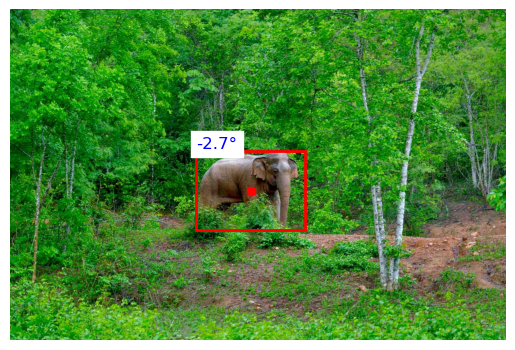

In [6]:
from ultralytics import YOLO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# === CONFIGURATIONS ===
model_path = r"runs/detect/cardboard-detector8/weights/best.pt"
image_path = r"C:\Users\Thevindu Kalubowila\Downloads\test4.jpg"
CAMERA_HORIZONTAL_FOV_DEGREES = 180  # Adjust as needed

# === LOAD MODEL AND RUN DETECTION ===
model = YOLO(model_path)
results = model.predict(source=image_path, show=False, save=False, conf=0.5)

# Load the image using PIL
image = Image.open(image_path)
width, height = image.size
image_center_x = width / 2

# Create matplotlib figure and axis
fig, ax = plt.subplots(1)
ax.imshow(image)

# Process detections
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = box.xyxy[0].numpy()
        box_center_x = (x1 + x2) / 2
        box_center_y = (y1 + y2) / 2

        # Calculate normalized offset and angle
        normalized_offset = (box_center_x - image_center_x) / image_center_x
        angle_degrees = normalized_offset * (CAMERA_HORIZONTAL_FOV_DEGREES / 2)

        print(f"Bounding Box Center: (x={box_center_x:.1f}, y={box_center_y:.1f})")
        print(f"Angle from center: {angle_degrees:.2f} degrees")

        # Draw bounding box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        # Draw center point
        ax.plot(box_center_x, box_center_y, 'ro')  # Red dot

        # Annotate angle
        ax.text(x1, y1 - 10, f"{angle_degrees:.1f}°",
                color='blue', fontsize=12, backgroundcolor='white')

# Show the plot
plt.axis('off')
plt.show()


In [9]:
import socket

UDP_IP = "10.230.32.12"  # Replace with ESP32 IP
UDP_PORT = 4210

# Example values
detection_status = "True"   # or "OFF"
detected_angle = 90     # angle in degrees

# Combine into single packet like "ON,12.5"
message = f"{detection_status},{detected_angle}"

sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.sendto(message.encode(), (UDP_IP, UDP_PORT))
print("Packet sent successfully:", message)


Packet sent successfully: True,90
